<Axes: title={'center': '$y=x^2+0.5x 0 3 + \\epsilon$'}>

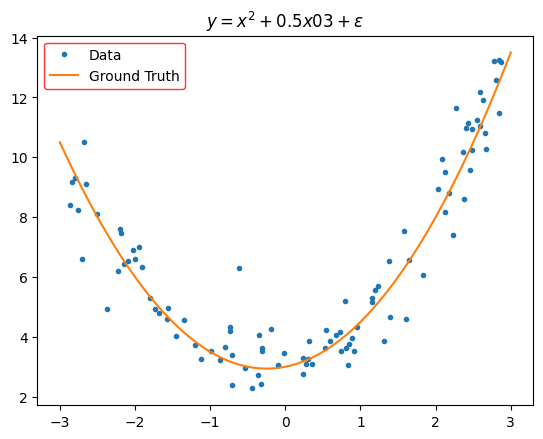

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def ground_truth(x):
    return np.square(x) + .5*x + 3

samples = 100
def draw_data(X, y):
    fig, ax = plt.figure(dpi=100), plt.axes()
    ax.plot(X,y, '.',label='Data')
    x = np.linspace(-3,3, samples)
    ax.plot(x, ground_truth(x), label='Ground Truth')
    ax.set(title=r"$y=x^2+0.5x 0 3 + \epsilon$")
    ax.legend(edgecolor='r')
    return ax

X = np.random.uniform(-3,3, (samples, 1))
y = ground_truth(X) + np.random.randn(samples, 1)

draw_data(X, y)


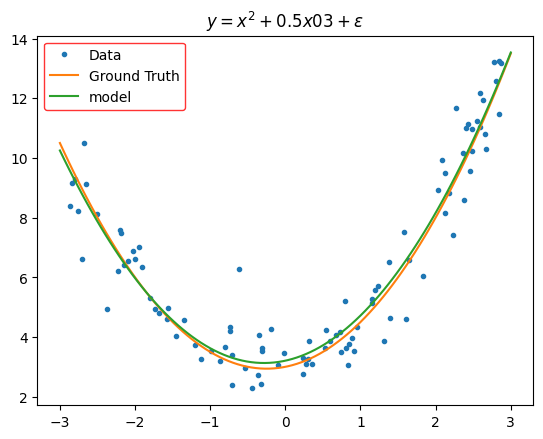

In [81]:
beta_hat = np.polyfit(X.reshape(-1,), y, deg=2)

ax = draw_data(X, y)
x = np.linspace(-3,3, samples)

ax.plot(x, beta_hat[0]*np.square(x) + beta_hat[1]*x + beta_hat[2], label='model')
ax.legend(edgecolor='r')

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
poly_features[:4], X[:4], np.square(X[:4])

(array([[ 2.07985298,  4.3257884 ],
        [-0.62117144,  0.38585396],
        [ 1.14827694,  1.31853993],
        [-2.20308408,  4.85357946]]),
 array([[ 2.07985298],
        [-0.62117144],
        [ 1.14827694],
        [-2.20308408]]),
 array([[4.3257884 ],
        [0.38585396],
        [1.31853993],
        [4.85357946]]))

In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(poly_features, y)

model.coef_,model.intercept_

(array([[0.54736045, 0.96502161]]), array([3.20550584]))

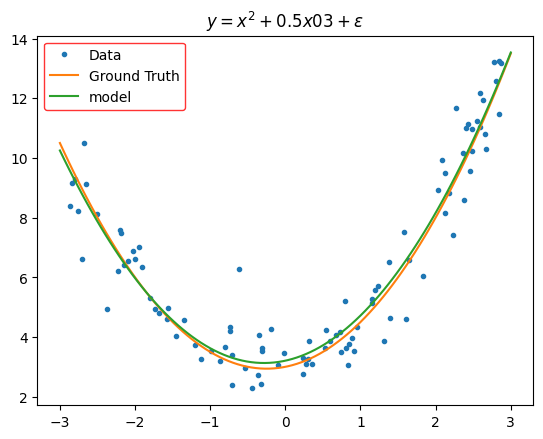

In [84]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))

pred =  model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred, label='model')
ax.legend(edgecolor='r')